# Data Cleaning

In [109]:
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# # Functions


In [110]:
#Import data 

dt = pd.read_csv('shelter-animal-outcomes/train.csv')

In [111]:
#inspect data 

dt.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [112]:
dt.shape

(26729, 10)

In [113]:
dt.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [114]:
## General viwe over data

In [115]:
dt.isna().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

Explore columns

In [116]:
"""
Outcome Type is the column we want to predict based on the other features
"""

'\nOutcome Type is the column we want to predict based on the other features\n'

In [117]:
"""
As an overview the columns/ features that might have impact on the outcome and the ones I'm going to focus are:
Animal Type, Breed and Color, SexUponOutcome, AgeUponOutcome
"""

"\nAs an overview the columns/ features that might have impact on the outcome and the ones I'm going to focus are:\nAnimal Type, Breed and Color, SexUponOutcome, AgeUponOutcome\n"

# OUTCOME -- what is going to be predicted -- Supervised Learning

In [118]:

dt['OutcomeType'].isna().sum()

0

In [119]:
dt['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [120]:
# Put together the animals who die with the ones were Euthanasia -- as DIED
dt['OutcomeType'].replace('Euthanasia','Died', inplace = True)

(array([10769.,     0.,     0.,  1752.,     0.,     0.,  4786.,     0.,
            0.,  9422.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

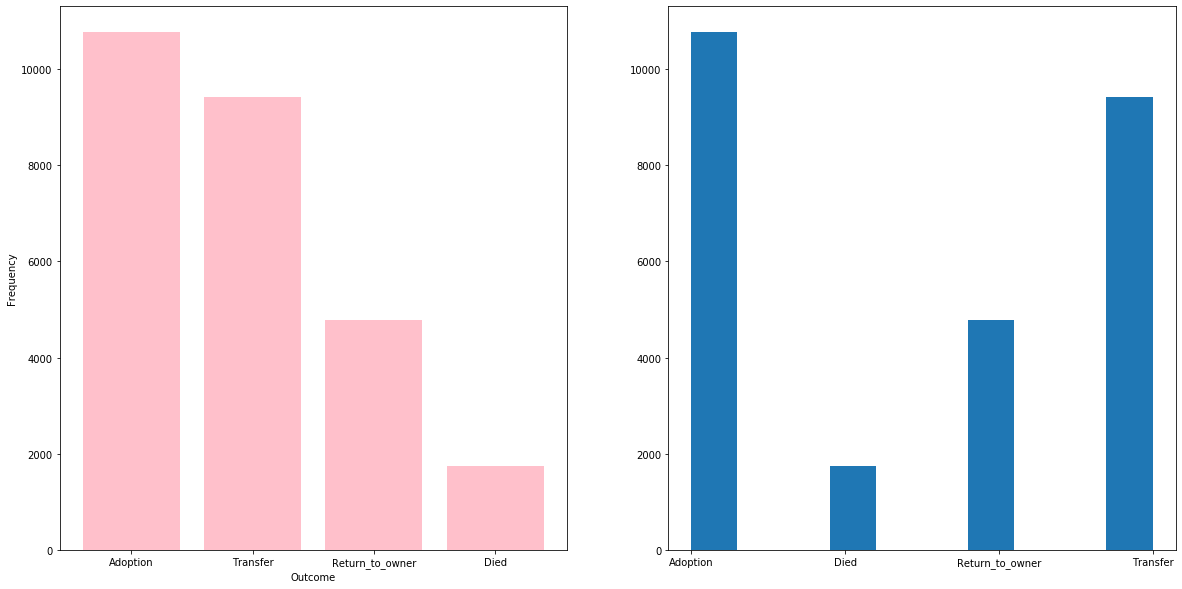

In [121]:
## Ploting Outcome

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].bar(dt['OutcomeType'].value_counts().keys(), dt['OutcomeType'].value_counts() , color = 'pink')
axs[0].set_xlabel('Outcome')
axs[0].set_ylabel('Frequency')
axs[1].hist(dt['OutcomeType'].sort_values())




In [122]:
"""
Probably use this line bellow to change the categorical feature we want to predict into an numerical one.
"""

##diamonds.replace(['Adoption', 'Transfer', 'Return_to_owner', 'Euthanasia', 'Died'], [3,2,4,0,1], inplace=True)

'\nProbably use this line bellow to change the categorical feature we want to predict into an numerical one.\n'

# Animal ID Will become the index

In [123]:
#Make animal id the index 

dt.set_index('AnimalID', inplace = True)

In [124]:
dt

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Died,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...
A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan


# Inspect Feature OutcomeSubtype 

In [125]:
dt.OutcomeSubtype.value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [126]:
out_sub = dt.OutcomeSubtype.isna().sum()

In [127]:
out_sub/dt.shape[0]

0.5092596056717423

In [128]:
"""
More that 50% of the data is missing regarding the subtype of the outcome.

I will drop this column!!!!

"""

'\nMore that 50% of the data is missing regarding the subtype of the outcome.\n\nI will drop this column!!!!\n\n'

In [129]:
## Drop outcomeSubtype
dt.drop(columns = 'OutcomeSubtype', inplace = True)

In [130]:
dt

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Died,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...
A702446,NaN,2015-05-14 11:56:00,Transfer,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
A718934,NaN,2016-01-20 18:59:00,Transfer,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
A698128,Zeus,2015-03-09 13:33:00,Adoption,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan


# Inspect Feature AnimalType 

In [131]:
dt.AnimalType.value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

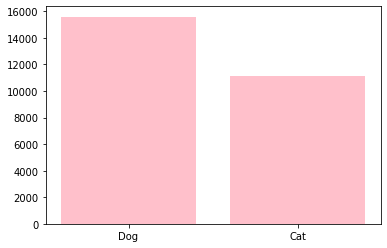

In [132]:
plt.bar(dt['AnimalType'].value_counts().keys(), dt['AnimalType'].value_counts() , color = 'pink')

plt.show()

# Inspect Feature Breed -- IMPORTANT FEATURE -- handle with care 

In [133]:
dt.Breed.value_counts()

#we have 1380 different ANIMAL BREEDs 

Domestic Shorthair Mix                    8810
Pit Bull Mix                              1906
Chihuahua Shorthair Mix                   1766
Labrador Retriever Mix                    1363
Domestic Medium Hair Mix                   839
                                          ... 
Queensland Heeler                            1
Cocker Spaniel/Chihuahua Longhair            1
Flat Coat Retriever/Labrador Retriever       1
Alaskan Malamute/German Shepherd             1
Maltese/Chihuahua Shorthair                  1
Name: Breed, Length: 1380, dtype: int64

In [134]:
## Animals Breed that only appears 1 time  --- see if I should use?
#0r
## Animals Breed that only appears less than 30 times  --- see if I should use?





In [135]:
dt.Breed.value_counts() == 1  ## want to know what the unique here 

Domestic Shorthair Mix                    False
Pit Bull Mix                              False
Chihuahua Shorthair Mix                   False
Labrador Retriever Mix                    False
Domestic Medium Hair Mix                  False
                                          ...  
Queensland Heeler                          True
Cocker Spaniel/Chihuahua Longhair          True
Flat Coat Retriever/Labrador Retriever     True
Alaskan Malamute/German Shepherd           True
Maltese/Chihuahua Shorthair                True
Name: Breed, Length: 1380, dtype: bool

In [136]:

#low_breed = dt['Breed'].value_counts()[dt['Breed'].value_counts() == 1]


low_breed = dt['Breed'].value_counts()[dt['Breed'].value_counts() < 500] ## Filtering the value count of breed 




In [137]:
"""
Filtered the breed into low breed, the animals breed that ocurre less that 500 times
will be subdevided into 3 categories. the ones that have in the breed a / will be put into a group. 
The ones with Mix into another and the ones without any of those into a third group.
"""

'\nFiltered the breed into low breed, the animals breed that ocurre less that 500 times\nwill be subdevided into 3 categories. the ones that have in the breed a / will be put into a group. \nThe ones with Mix into another and the ones without any of those into a third group.\n'

In [138]:
dt.Breed.value_counts()[-1000:-1]

Dogue De Bordeaux Mix                     4
Chihuahua Shorthair/Pit Bull              4
Cocker Spaniel/Miniature Poodle           4
Standard Poodle/Labrador Retriever        4
Tonkinese Mix                             4
                                         ..
Swedish Vallhund/Miniature Poodle         1
Queensland Heeler                         1
Cocker Spaniel/Chihuahua Longhair         1
Flat Coat Retriever/Labrador Retriever    1
Alaskan Malamute/German Shepherd          1
Name: Breed, Length: 999, dtype: int64

In [139]:
## Number of Breeds that appear only 1 time 

dt.Breed.value_counts()[dt.Breed.value_counts().values == 1].shape

(679,)

In [140]:
## Number of Breeds that appear only 2 time 



dt.Breed.value_counts()[dt.Breed.value_counts().values == 2].shape

(218,)

In [141]:
dt.Breed.value_counts()[dt.Breed.value_counts().values == 3].shape

(90,)

In [142]:
dt.Breed.value_counts()[dt.Breed.value_counts().values == 4].shape

(60,)

In [143]:
dt.Breed.value_counts()[dt.Breed.value_counts().values == 5].shape

(42,)

In [144]:
siz_low_breed = len(low_breed)
siz_low_breed

1373

In [145]:
### Relative frequency of animals which theire breed is unique
siz_low_breed/dt.shape[0]

## the percentage is low relative to all the animals

0.05136742863556437

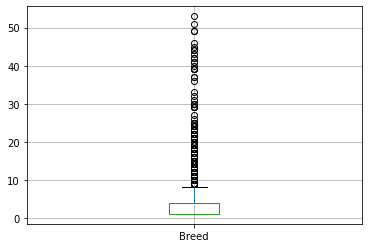

In [146]:
#Boxplot to vizualize the describe 

pd.DataFrame(dt.Breed.value_counts()[50:]).boxplot()
plt.show()

In [147]:
## Breed that have big representation -- only seven 

dt.Breed.value_counts().shape[0] - siz_low_breed

7

In [148]:
### Relative frequency of animals which theire breed is unique
siz_low_breed/dt.shape[0]

## the percentage is low relative to all the animals

0.05136742863556437

In [149]:
dt.Breed.value_counts().shape


(1380,)

In [150]:
### Relative frequency of animals with low breed relativly with other animals with more breed

siz_low_breed/ dt.Breed.value_counts().shape[0]

## the percentage is high

0.994927536231884

In [151]:
"""
We can conclued that although there is a smal number of unique breed in all the animals, this uniques represent
almost 50 percent of the the different breeds in all the dataset. 
we Can't remove them. They are the ones that increase the diversity.

"""

"\nWe can conclued that although there is a smal number of unique breed in all the animals, this uniques represent\nalmost 50 percent of the the different breeds in all the dataset. \nwe Can't remove them. They are the ones that increase the diversity.\n\n"

In [152]:
low_breed.index


Index(['Siamese Mix', 'Australian Cattle Dog Mix', 'Dachshund Mix',
       'Boxer Mix', 'Miniature Poodle Mix', 'Border Collie Mix',
       'Australian Shepherd Mix', 'Rat Terrier Mix', 'Catahoula Mix',
       'Jack Russell Terrier Mix',
       ...
       'Lhasa Apso/Yorkshire Terrier', 'Staffordshire/Blue Lacy',
       'Cavalier Span/Papillon', 'Dachshund Wirehair/Pbgv',
       'Swedish Vallhund/Miniature Poodle', 'Queensland Heeler',
       'Cocker Spaniel/Chihuahua Longhair',
       'Flat Coat Retriever/Labrador Retriever',
       'Alaskan Malamute/German Shepherd', 'Maltese/Chihuahua Shorthair'],
      dtype='object', length=1373)

In [153]:
# decide wether to use this or not -- Filter

dt.loc[dt['Breed'].isin(low_breed.index)]

,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A667013,NaN,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
A677334,Elsa,2014-04-25 13:04:00,Transfer,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
A671784,Lucy,2014-02-04 17:17:00,Adoption,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
A677747,NaN,2014-05-03 07:48:00,Adoption,Dog,Spayed Female,1 year,Cairn Terrier,White
...,...,...,...,...,...,...,...,...
A697158,Max,2015-05-02 21:04:00,Adoption,Dog,Neutered Male,2 months,Newfoundland Mix,White/Black
A519949,Bella,2014-06-30 17:34:00,Return_to_owner,Dog,Spayed Female,9 years,Bullmastiff Mix,Black
A701044,NaN,2015-04-28 14:26:00,Adoption,Dog,Neutered Male,2 months,Siberian Husky/German Shepherd,Black/Tricolor


In [154]:
## Create the Groupers 

lw_name = list(low_breed.keys())


rare_d = [name for name in lw_name if '/' in name] # Rare Double
rare_m = [name for name in lw_name if 'Mix' in name] # Rare Mix
rare = [name for name in lw_name if 'Mix' not in name and '/' not in name ] # Rare

# Rename Breeds 

dt.loc[dt['Breed'].isin(rare_d), 'Breed'] = 'Rare_Double'
dt.loc[dt['Breed'].isin(rare_m), 'Breed'] = 'Rare_Mix'
dt.loc[dt['Breed'].isin(rare), 'Breed'] = 'Rare'

In [155]:
"""
In order to check wich are the groups of Breeds correspondig to Rare Double, Rare Mix or Rare,
see the line of code above and print 

"""

'\nIn order to check wich are the groups of Breeds correspondig to Rare Double, Rare Mix or Rare,\nsee the line of code above and print \n\n'

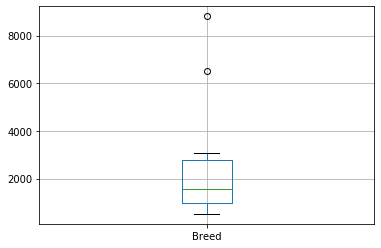

In [156]:
pd.DataFrame(dt.Breed.value_counts()).boxplot()

plt.show()

In [157]:
dt['Breed'].unique().shape

(10,)

In [158]:
"""
Insight:

Problably will do an hot encoding of this one.

-------
Response:

Will do an Hot encoding of the 10 Breeds!!!

"""

'\nInsight:\n\nProblably will do an hot encoding of this one.\n\n-------\nResponse:\n\nWill do an Hot encoding of the 10 Breeds!!!\n\n'

# Inspect Feature DATETIME -- use in analysis. not in prediction (probably)

In [159]:
# Convert DateTime column object to dattime format

dt['DateTime'] = pd.to_datetime(dt['DateTime'])


In [160]:
## discover the time-range: 

dt['DateTime'].min(), dt['DateTime'].max()

(Timestamp('2013-10-01 09:31:00'), Timestamp('2016-02-21 19:17:00'))

In [161]:
""" 

The time goes from 1 of October of 2013 to 21st of february of 2016.
So we are missing 9 months in 2013 and 9 months on 2016.

"""

' \n\nThe time goes from 1 of October of 2013 to 21st of february of 2016.\nSo we are missing 9 months in 2013 and 9 months on 2016.\n\n'

In [162]:
dt['day'] = dt['DateTime'].dt.day
dt['month'] = dt['DateTime'].dt.month
dt['year'] = dt['DateTime'].dt.year


In [164]:
## Used just to change the code cell bellow and produce the other graphs 
dt['OutcomeType'].unique()

array(['Return_to_owner', 'Died', 'Adoption', 'Transfer'], dtype=object)

In [181]:
## Group table by year 

adopt = dt.loc[dt['OutcomeType']== 'Return_to_owner']

adopt = adopt[['DateTime','OutcomeType']]

piv = adopt.pivot_table(values = ['OutcomeType'], index = adopt['DateTime'].dt.year , aggfunc = ({'OutcomeType':'count'}))
piv

,OutcomeType
DateTime,
2013,434
2014,1880
2015,2167
2016,305


In [176]:
## For Relative Frequency
#piv = piv/piv.sum()

In [177]:
# np.cumsum gives the comulative sum throughout the years 
np.cumsum(piv['OutcomeType'])

DateTime
2013     199
2014     992
2015    1706
2016    1752
Name: OutcomeType, dtype: int64

In [178]:
np.cumsum(piv['OutcomeType']).max()

1752

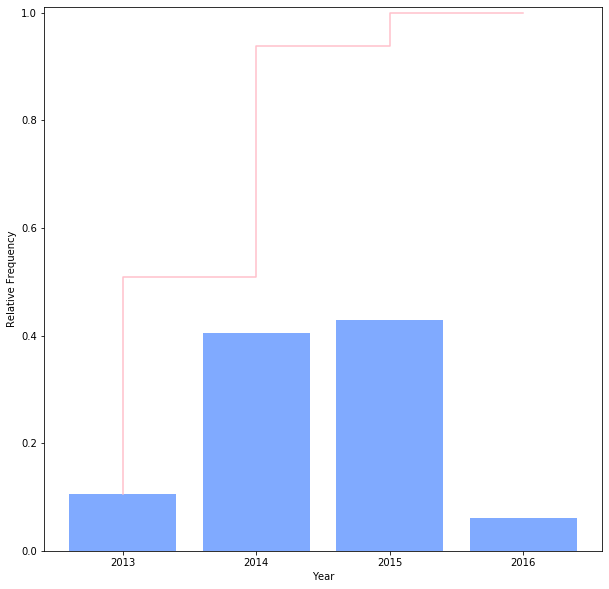

In [174]:
# Plot adoption by year 
fig, axs = plt.subplots(figsize=(10, 10))

limit = np.cumsum(piv['OutcomeType']).max()

# for y limit 
plt.ylim(0, limit + 0.01)

plt.bar(piv.index, piv['OutcomeType'], color = '#80aaff')
# us step graph for the comulative increse 
plt.step(piv.index, np.cumsum(piv['OutcomeType']), color = 'pink')  # np.cumsum(piv['OutcomeType']) change for piv['OutcomeType'] for normal 
plt.xticks(list(piv.index))
#plt.title('Adoption by Year')
plt.ylabel('Relative Frequency')
plt.xlabel('Year')

#plt.savefig('Adoption1.png', bbox_inches='tight') # for saving

plt.show()


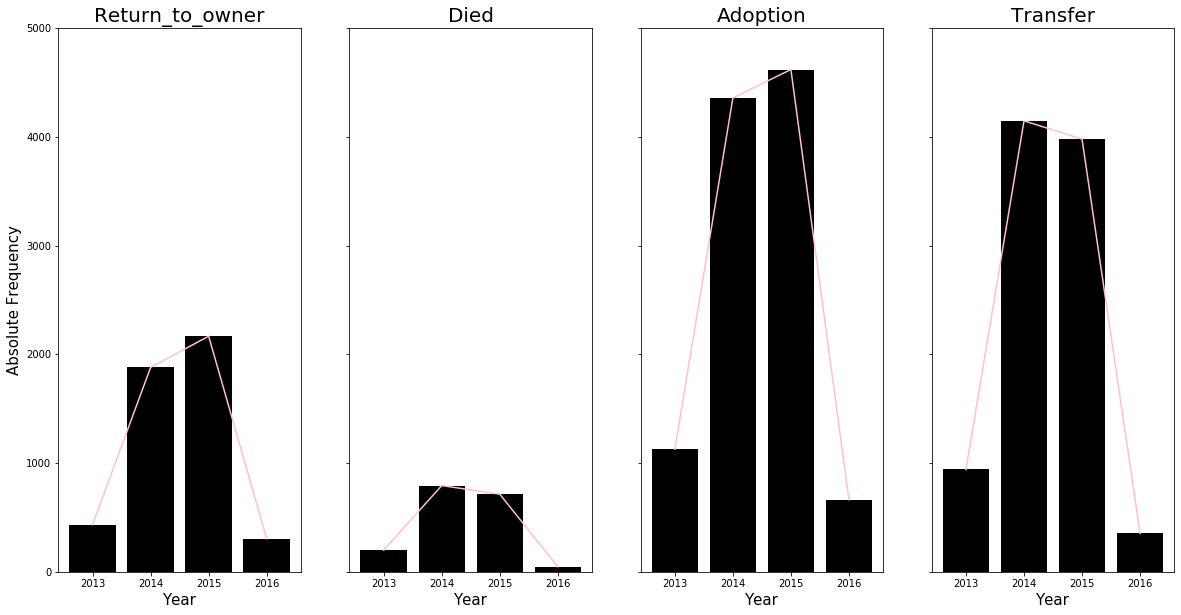

In [61]:
## do Plotting for outcome at once 


fig, axs = plt.subplots(1, 4, figsize=(20, 10))

#custom_xlim = (0, 100) ## for subplots 
custom_ylim = (0, 5000) ## for subplots 


# set the same scale for all the plots 

plt.setp(axs, ylim=custom_ylim)


for i, out in enumerate(dt['OutcomeType'].unique()):
    outcome = dt[['DateTime','OutcomeType']]
    outcome = outcome.loc[outcome['OutcomeType']== out]
    piv = outcome.pivot_table(values = ['OutcomeType'], index = outcome['DateTime'].dt.year , aggfunc = ({'OutcomeType':'count'}))

    axs[i].bar(piv.index, piv['OutcomeType'], color = 'black')
    axs[i].plot(piv.index, piv['OutcomeType'], color = 'pink')
    axs[i].set_title(out,fontsize= 20)
    axs[i].set_ylabel('Absolute Frequency', fontsize = 15.0)
    axs[i].set_xlabel('Year', fontsize = 15.0)
    

#for ax in axs.flat:
 #   ax.set(xlabel='Year', ylabel='Absolute Frequency')

# Hide x labels and tick labels for top plots and y ticks for right plots.


for ax in axs.flat:
    ax.label_outer()

In [62]:
dt.drop(columns = 'DateTime', inplace = True)

# Inspect feature SexuponOutcome

In [63]:
dt.loc[dt['SexuponOutcome'].isna()]

,Name,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,day,month,year
AnimalID,,,,,,,,,,
A667395,Diego,Return_to_owner,Dog,NaN,7 years,Rare,Brown Merle,27,11,2013


In [64]:
dt.drop(index = 'A667395', inplace = True)

In [65]:
"""

Drop the row that has no SexuponOutcome.

"""

'\n\nDrop the row that has no SexuponOutcome.\n\n'

In [66]:
## Reset the index because I removed a row. ## Not needed anymore 

#dt = dt.reset_index(drop=True)


In [67]:
dt['SexuponOutcome'].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [68]:
#sex_list = list(dt['SexuponOutcome'].unique())

#for sex in sex_list:
    #austin_fixed[event] = austin_fixed['Events'].str.contains(event).astype(int)

In [69]:
# Creat a Gener Column based on Sex Upon Outcome
dt['Genere'] = ['Male' if 'Male' in gen else 'Female' if 'Female' in gen else 'Unknown' for gen in dt['SexuponOutcome']]

# Create a Steril or Normal Column based on Sex Upon Outcome

dt['Spayed/Neutered'] = [1 if 'Spayed' in gen else 1 if 'Neutered' in gen else 0 for gen in dt['SexuponOutcome']]



In [70]:
dt.drop(columns = 'SexuponOutcome', inplace = True)

In [71]:
dt.head()

,Name,OutcomeType,AnimalType,AgeuponOutcome,Breed,Color,day,month,year,Genere,Spayed/Neutered
AnimalID,,,,,,,,,,,
A671945,Hambone,Return_to_owner,Dog,1 year,Rare_Mix,Brown/White,12,2,2014,Male,1
A656520,Emily,Died,Cat,1 year,Domestic Shorthair Mix,Cream Tabby,13,10,2013,Female,1
A686464,Pearce,Adoption,Dog,2 years,Pit Bull Mix,Blue/White,31,1,2015,Male,1
A683430,NaN,Transfer,Cat,3 weeks,Domestic Shorthair Mix,Blue Cream,11,7,2014,Male,0
A667013,NaN,Transfer,Dog,2 years,Rare_Double,Tan,15,11,2013,Male,1


# Inspect feature AgeuponOutcome

In [72]:
dt['AgeuponOutcome'].isna().sum()

18

In [73]:
dt.loc[dt['AgeuponOutcome'].isna()]

,Name,OutcomeType,AnimalType,AgeuponOutcome,Breed,Color,day,month,year,Genere,Spayed/Neutered
AnimalID,,,,,,,,,,,
A720674,NaN,Transfer,Cat,NaN,Domestic Shorthair Mix,Blue Tabby/White,16,2,2016,Male,0
A720973,NaN,Transfer,Cat,NaN,Domestic Shorthair Mix,Gray Tabby,18,2,2016,Unknown,0
A720820,NaN,Transfer,Cat,NaN,Domestic Shorthair Mix,Brown Tabby,16,2,2016,Female,0
A721076,NaN,Died,Dog,NaN,Rare_Mix,White,20,2,2016,Male,0
A720422,NaN,Transfer,Cat,NaN,Domestic Shorthair Mix,Brown Tabby,9,2,2016,Female,0
A720697,NaN,Transfer,Cat,NaN,Domestic Shorthair Mix,Black,16,2,2016,Female,1
A720640,NaN,Transfer,Cat,NaN,Domestic Shorthair Mix,Black Tabby/White,16,2,2016,Unknown,0
A720636,NaN,Transfer,Cat,NaN,Domestic Shorthair Mix,Black,16,2,2016,Unknown,0
A720701,NaN,Transfer,Cat,NaN,Domestic Shorthair Mix,Blue Tabby/White,16,2,2016,Male,0


In [74]:
## Drop the 18 rows that have NaN in AgeuponOutcome

dt.drop(index = dt.loc[dt['AgeuponOutcome'].isna()].index , inplace = True)

In [75]:
# Reset the index again ## NOT NEEDED ANYMORE 

#dt.reset_index(drop = True)

In [76]:
## Convert age upon outcome into the same unity  : decided it to be month 

dt['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

In [77]:
## FUNCTION 1#

def convert_to_month(s):
    """
    Convert a string value to numeric. Also make the unity of the string as months.
    
    Args:
        s: The AgeuponOutcome in string format.

    Returns:
        The correct value in Months.
    """
    
    if 'year' in s or 'years' in s:
        
        return float(re.sub('\D+', '', s))* 12
    
    elif 'month' in s or 'months' in s:
        
        return float(re.sub('\D+', '', s))
    
    elif 'week' in s or 'weeks' in s:
        
        return float(re.sub('\D+', '', s)) * 0.23
    else:
        
        return float(re.sub('\D+', '', s)) * 0.03
    
    

In [78]:
dt['AgeuponOutcome'] = dt['AgeuponOutcome'].apply(convert_to_month)

In [79]:
dt.rename(columns = {'AgeuponOutcome': 'Age_Months'}, inplace = True)

In [80]:
dt.head()

,Name,OutcomeType,AnimalType,Age_Months,Breed,Color,day,month,year,Genere,Spayed/Neutered
AnimalID,,,,,,,,,,,
A671945,Hambone,Return_to_owner,Dog,12.00,Rare_Mix,Brown/White,12,2,2014,Male,1
A656520,Emily,Died,Cat,12.00,Domestic Shorthair Mix,Cream Tabby,13,10,2013,Female,1
A686464,Pearce,Adoption,Dog,24.00,Pit Bull Mix,Blue/White,31,1,2015,Male,1
A683430,NaN,Transfer,Cat,0.69,Domestic Shorthair Mix,Blue Cream,11,7,2014,Male,0
A667013,NaN,Transfer,Dog,24.00,Rare_Double,Tan,15,11,2013,Male,1


# Animal Name column --- after anlayzis drop it


In [81]:
a_name = pd.DataFrame(dt['Name'].value_counts())
a_name.rename(columns = {'Name': 'Frequency'}, inplace = True)

a_name.loc[a_name['Frequency'] > 50]

a_name.head(10)



,Frequency
Max,136
Bella,135
Charlie,107
Daisy,106
Lucy,94
Buddy,87
Princess,86
Rocky,85
Luna,68
Jack,66


In [82]:
a_name.head(10).index

Index(['Max', 'Bella', 'Charlie', 'Daisy', 'Lucy', 'Buddy', 'Princess',
       'Rocky', 'Luna', 'Jack'],
      dtype='object')

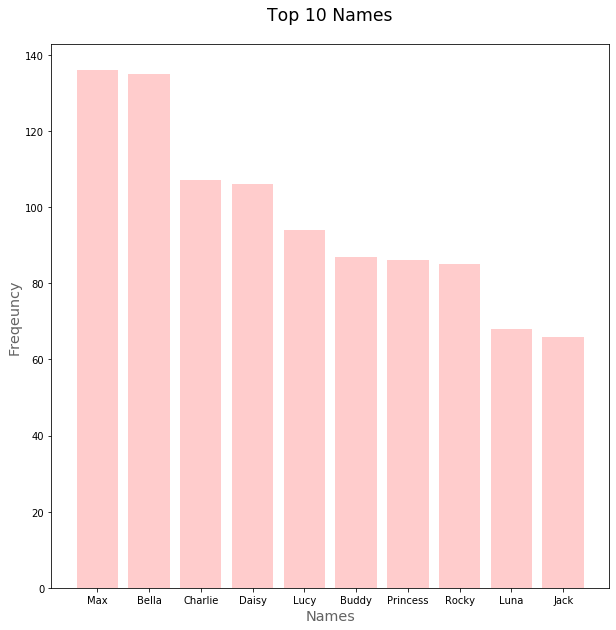

In [83]:
plt.figure(figsize = (10,10))

plt.bar(x = a_name.head(10).index, height = a_name.head(10)['Frequency'], color = '#ffcccc')

plt.ylabel('Freqeuncy', fontsize = 'x-large', alpha = 100)
plt.xlabel('Names', fontsize = 'x-large', alpha = 100) # alpha is transparency 
plt.title('Top 10 Names', fontsize = 'xx-large', position = (0.5,1.033))
#plt.savefig('Topnames.png',  bbox_inches='tight')
plt.show()

In [84]:
"""
The most frequent names are the ones displayed on the graph above
"""


'\nThe most frequent names are the ones displayed on the graph above\n'

In [85]:
# Drop the Name column

dt.drop(columns = 'Name', inplace = True)

In [86]:
"""
Not gonna be relevant in the prediction

"""

'\nNot gonna be relevant in the prediction\n\n'

# Color feature 

In [87]:
dt['Color'].value_counts()

Black/White                2824
Black                      2288
Brown Tabby                1631
Brown Tabby/White           939
White                       930
                           ... 
Cream/Seal Point              1
Chocolate/Brown Brindle       1
Tan/Brown Brindle             1
Orange Tabby/Orange           1
Black/Yellow                  1
Name: Color, Length: 366, dtype: int64

In [88]:
dt['Color'].unique()

array(['Brown/White', 'Cream Tabby', 'Blue/White', 'Blue Cream', 'Tan',
       'Black/Tan', 'Blue Tabby', 'Brown Tabby', 'Red/White', 'White',
       'Black', 'Silver', 'Brown', 'Black/Red', 'White/Cream',
       'Orange Tabby/White', 'Black/White', 'Brown Brindle/White',
       'Black/Brown', 'Orange Tabby', 'Chocolate/White', 'White/Tan',
       'Cream Tabby/White', 'Blue', 'Calico', 'Torbie', 'Brown/Black',
       'Yellow', 'Tricolor', 'White/Black', 'Tortie', 'Blue Tabby/White',
       'Gray/White', 'Tan/Black', 'Tan/White', 'Buff',
       'Brown Tabby/White', 'Red', 'Blue/Tan', 'Seal Point',
       'Brown Brindle', 'White/Brown', 'Gray', 'Yellow Brindle/White',
       'Fawn/White', 'Flame Point', 'Black Tabby/White', 'Tortie/Calico',
       'Black/Brown Brindle', 'White/Gray', 'Tan/Silver',
       'Red Tick/Black', 'White/Cream Tabby', 'Blue Merle',
       'Chocolate/Tan', 'Sable', 'Brown Merle/White', 'Brown Tiger/White',
       'Liver/White', 'White/Blue Tabby', 'Black/Gray', 'C

In [89]:
"""

I have 366 diferent types of color! Should I do an Hot encode of this and get 366 more columns or is it too much ?

"""

'\n\nI have 366 diferent types of color! Should I do an Hot encode of this and get 366 more columns or is it too much ?\n\n'

In [90]:
col = list(dt['Color'].unique())
col

['Brown/White',
 'Cream Tabby',
 'Blue/White',
 'Blue Cream',
 'Tan',
 'Black/Tan',
 'Blue Tabby',
 'Brown Tabby',
 'Red/White',
 'White',
 'Black',
 'Silver',
 'Brown',
 'Black/Red',
 'White/Cream',
 'Orange Tabby/White',
 'Black/White',
 'Brown Brindle/White',
 'Black/Brown',
 'Orange Tabby',
 'Chocolate/White',
 'White/Tan',
 'Cream Tabby/White',
 'Blue',
 'Calico',
 'Torbie',
 'Brown/Black',
 'Yellow',
 'Tricolor',
 'White/Black',
 'Tortie',
 'Blue Tabby/White',
 'Gray/White',
 'Tan/Black',
 'Tan/White',
 'Buff',
 'Brown Tabby/White',
 'Red',
 'Blue/Tan',
 'Seal Point',
 'Brown Brindle',
 'White/Brown',
 'Gray',
 'Yellow Brindle/White',
 'Fawn/White',
 'Flame Point',
 'Black Tabby/White',
 'Tortie/Calico',
 'Black/Brown Brindle',
 'White/Gray',
 'Tan/Silver',
 'Red Tick/Black',
 'White/Cream Tabby',
 'Blue Merle',
 'Chocolate/Tan',
 'Sable',
 'Brown Merle/White',
 'Brown Tiger/White',
 'Liver/White',
 'White/Blue Tabby',
 'Black/Gray',
 'Cream',
 'Chocolate',
 'Blue Point',
 'Apric

In [91]:
# Split the color by the / for first color and second color

dt['Color1'], dt['Color2'] = dt['Color'].str.split('/', 1).str


In [92]:
dt['Color1'].unique()

array(['Brown', 'Cream Tabby', 'Blue', 'Blue Cream', 'Tan', 'Black',
       'Blue Tabby', 'Brown Tabby', 'Red', 'White', 'Silver',
       'Orange Tabby', 'Brown Brindle', 'Chocolate', 'Calico', 'Torbie',
       'Yellow', 'Tricolor', 'Tortie', 'Gray', 'Buff', 'Seal Point',
       'Yellow Brindle', 'Fawn', 'Flame Point', 'Black Tabby', 'Red Tick',
       'Blue Merle', 'Sable', 'Brown Merle', 'Brown Tiger', 'Liver',
       'Cream', 'Blue Point', 'Apricot', 'Red Merle', 'Lynx Point',
       'Lilac Point', 'Tortie Point', 'Gray Tabby', 'Blue Tiger', 'Gold',
       'Blue Tick', 'Black Smoke', 'Calico Point', 'Black Brindle',
       'Silver Tabby', 'Orange', 'Chocolate Point', 'Agouti',
       'Blue Smoke', 'Liver Tick', 'Pink', 'Silver Lynx Point', 'Ruddy',
       'Black Tiger', 'Orange Tiger'], dtype=object)

In [93]:
list(dt['Color2'].unique())[1]

nan

In [94]:
dt['Color2'].fillna('NaN', inplace = True)

In [95]:
dt['Color1'] = [n.split(' ')[0] for n in dt['Color1']]
dt['Color2'] = [n.split(' ')[0] if n != 'NaN'  else  'NaN' for n in dt['Color2']]




In [96]:
dt['Color1'].unique()

array(['Brown', 'Cream', 'Blue', 'Tan', 'Black', 'Red', 'White', 'Silver',
       'Orange', 'Chocolate', 'Calico', 'Torbie', 'Yellow', 'Tricolor',
       'Tortie', 'Gray', 'Buff', 'Seal', 'Fawn', 'Flame', 'Sable',
       'Liver', 'Apricot', 'Lynx', 'Lilac', 'Gold', 'Agouti', 'Pink',
       'Ruddy'], dtype=object)

In [97]:
dt['Color1'].value_counts()

Black        6641
Brown        5312
White        3343
Blue         2146
Tan          1674
Orange       1343
Red           871
Tricolor      800
Tortie        613
Calico        579
Cream         497
Chocolate     469
Torbie        397
Sable         324
Gray          277
Buff          267
Yellow        261
Fawn          209
Lynx          183
Seal          158
Silver         96
Flame          85
Gold           77
Lilac          39
Apricot        26
Liver          19
Agouti          2
Pink            1
Ruddy           1
Name: Color1, dtype: int64

In [98]:
dt['Color2'].unique()

array(['White', 'NaN', 'Tan', 'Red', 'Cream', 'Brown', 'Black', 'Calico',
       'Gray', 'Silver', 'Blue', 'Orange', 'Tricolor', 'Lynx', 'Buff',
       'Chocolate', 'Liver', 'Gold', 'Apricot', 'Tortie', 'Yellow',
       'Pink', 'Flame', 'Seal'], dtype=object)

In [99]:
dt['Color2'].value_counts()

NaN          12790
White         8850
Black         1392
Brown         1381
Tan           1357
Blue           209
Gray           129
Red            120
Tricolor       112
Orange          97
Cream           80
Buff            61
Chocolate       50
Silver          26
Yellow          15
Liver           12
Gold             9
Tortie           4
Calico           4
Apricot          4
Lynx             3
Pink             3
Flame            1
Seal             1
Name: Color2, dtype: int64

In [100]:
dt.drop(columns = 'Color', inplace = True)

In [101]:
dt['Color2']['A656520']

'NaN'

In [102]:
#dt['Color2'] = dt['Color2'].apply(lambda x : None if x == 'NaN' else x )

# Save Cleaned Data

In [103]:
dt.dtypes

OutcomeType         object
AnimalType          object
Age_Months         float64
Breed               object
day                  int64
month                int64
year                 int64
Genere              object
Spayed/Neutered      int64
Color1              object
Color2              object
dtype: object

In [104]:
dt.head()

,OutcomeType,AnimalType,Age_Months,Breed,day,month,year,Genere,Spayed/Neutered,Color1,Color2
AnimalID,,,,,,,,,,,
A671945,Return_to_owner,Dog,12.00,Rare_Mix,12,2,2014,Male,1,Brown,White
A656520,Died,Cat,12.00,Domestic Shorthair Mix,13,10,2013,Female,1,Cream,NaN
A686464,Adoption,Dog,24.00,Pit Bull Mix,31,1,2015,Male,1,Blue,White
A683430,Transfer,Cat,0.69,Domestic Shorthair Mix,11,7,2014,Male,0,Blue,NaN
A667013,Transfer,Dog,24.00,Rare_Double,15,11,2013,Male,1,Tan,NaN


In [105]:
data = dt[['AnimalType', 'Breed','Color1', 'Color2', 'Genere', 'Spayed/Neutered', 'Age_Months', 'OutcomeType']]
data.head()

,AnimalType,Breed,Color1,Color2,Genere,Spayed/Neutered,Age_Months,OutcomeType
AnimalID,,,,,,,,
A671945,Dog,Rare_Mix,Brown,White,Male,1,12.00,Return_to_owner
A656520,Cat,Domestic Shorthair Mix,Cream,NaN,Female,1,12.00,Died
A686464,Dog,Pit Bull Mix,Blue,White,Male,1,24.00,Adoption
A683430,Cat,Domestic Shorthair Mix,Blue,NaN,Male,0,0.69,Transfer
A667013,Dog,Rare_Double,Tan,NaN,Male,1,24.00,Transfer


In [106]:
data['Color2'].value_counts()

NaN          12790
White         8850
Black         1392
Brown         1381
Tan           1357
Blue           209
Gray           129
Red            120
Tricolor       112
Orange          97
Cream           80
Buff            61
Chocolate       50
Silver          26
Yellow          15
Liver           12
Gold             9
Tortie           4
Calico           4
Apricot          4
Lynx             3
Pink             3
Flame            1
Seal             1
Name: Color2, dtype: int64

In [107]:
data.to_csv('Shelter_animal_outcome_clean')

In [108]:
##Use this code for the 

import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})


##and this 

# your code here

sns.regplot(x="carat", y="price", data=diamonds);

NameError: name 'diamonds' is not defined